### Task-1: Plot the hourly demand of bikes in 2012. Using kernel density estimation, plot the density of hourly demand for that year.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("default")
import seaborn as sns
sns.set()

In [2]:
bike_df = pd.read_csv("hour.csv")
bike_df = bike_df[bike_df['dteday'] >= "2012-01-01"]
bike_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8645,8646,2012-01-01,1,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000,5,43,48
8646,8647,2012-01-01,1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343,15,78,93
8647,8648,2012-01-01,1,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000,16,59,75


In [3]:
bike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,8734.000000,8734.000000,8734.0,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000
mean,13012.500000,2.489810,1.0,6.501946,11.520151,0.029883,2.994733,0.681704,1.413098,0.504825,0.482481,0.611193,0.189034,42.679757,191.986604,234.666361
std,2521.432959,1.108279,0.0,3.449086,6.921208,0.170275,2.005254,0.465842,0.624470,0.186752,0.166587,0.188184,0.121490,56.970413,175.481637,208.910941
min,8646.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.015200,0.160000,0.000000,0.000000,0.000000,1.000000
25%,10829.250000,2.000000,1.0,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.460000,0.104500,5.000000,46.000000,53.000000
50%,13012.500000,2.000000,1.0,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.520000,0.484800,0.610000,0.164200,20.000000,156.000000,191.000000
75%,15195.750000,3.000000,1.0,9.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.770000,0.253700,60.000000,275.000000,347.000000
max,17379.000000,4.000000,1.0,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.924200,1.000000,0.806000,367.000000,886.000000,977.000000


In [3]:
hourly_bike_count = bike_df.groupby("hr")["cnt"].sum()
unique_hr = bike_df["hr"].unique()
# hourly_bike_count, unique_hr

#### Plotting with matplotlib

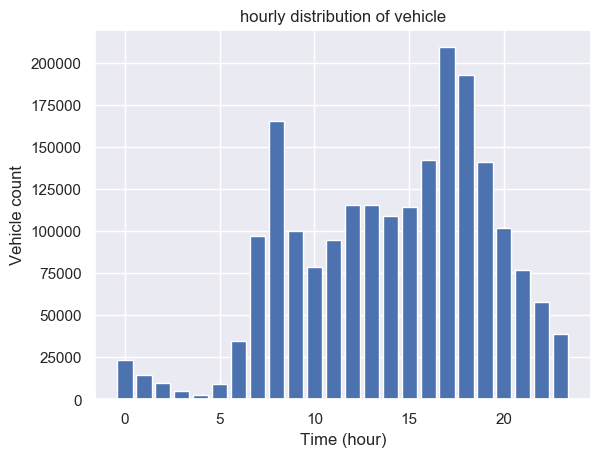

In [6]:
plt.bar(x=unique_hr, height=hourly_bike_count)

plt.xlabel("Time (hour)")
plt.ylabel("Vehicle count")
plt.title("hourly distribution of vehicle")
plt.show()

In [8]:
check = 0
idx = 0
for val in bike_df["hr"]:
    if val == 5:
        check += bike_df.iloc[idx, -1]
    idx += 1        

check

9104

#### Plotting with seaborn

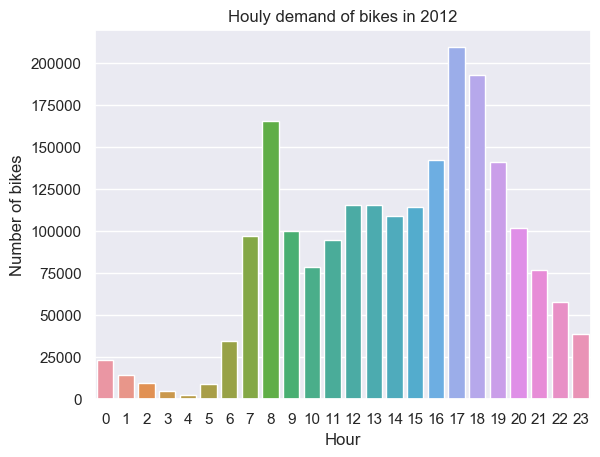

In [7]:
ax = sns.barplot(x=unique_hr, y=hourly_bike_count)

ax.set_title("Houly demand of bikes in 2012")
ax.set_xlabel("Hour")
ax.set_ylabel("Number of bikes");

### Using KDE

The Kernel density estimate: $ \hat{f}(x) = \frac{1}{N}\sum \limits _{i=1} ^{N} K_{h}(x-x_{i}) = \frac{1}{Nh}\sum \limits _{i=1} ^{N} K(\frac{x-x_{i}}{h}) $ <br/>
where `K` is the kernel and `h > 0` is a smooting parameter called `bandwidth`

The Kernel function is typically:
- a non-negative function: K(x) $\ge$ 0 for every x
- symmetric: K(x) = K(-x) for every x

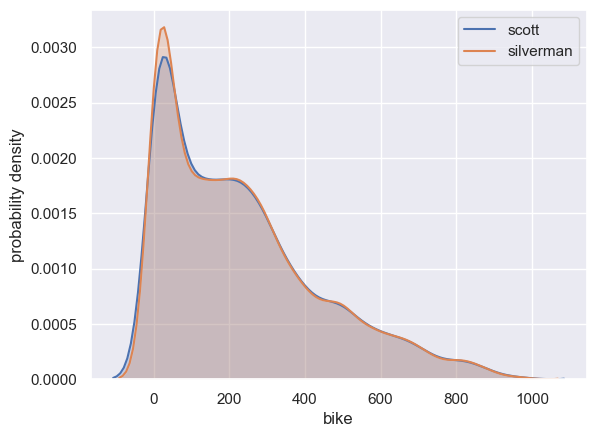

In [8]:
sns.kdeplot(bike_df["cnt"], shade=True, kernel="gau", bw="scott", Label="scott")
sns.kdeplot(bike_df["cnt"], shade=True, kernel="gau", bw="silverman", Label="silverman")
plt.xlabel("bike")
plt.ylabel("probability density");

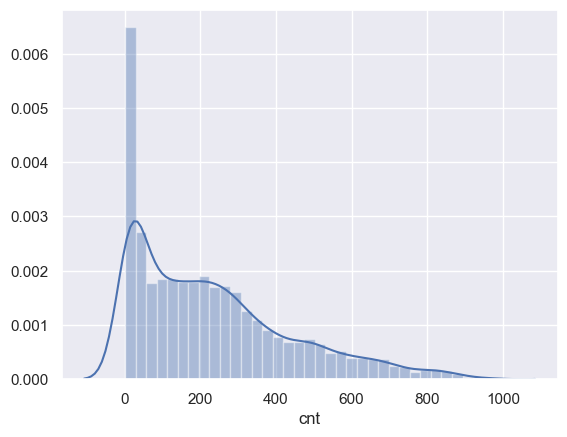

In [9]:
sns.distplot(bike_df["cnt"]);

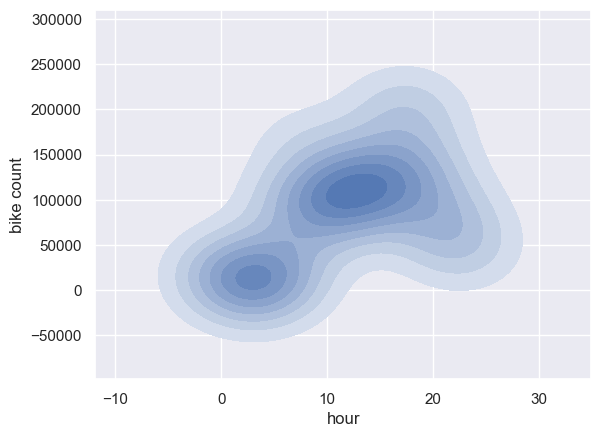

In [16]:
sns.kdeplot(unique_hr, hourly_bike_count, shade=True, shade_lowest=False);
plt.xlabel("hour")
plt.ylabel("bike count");

### Kde plot with scikit-learn

[GridSearchCV](https://www.mygreatlearning.com/blog/gridsearchcv/)

In [11]:
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [19]:
np.logspace(-1, 1, 20)

array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])

In [21]:
np.linspace(-1, 1, 20)

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [10]:
bike_df.shape

(8734, 17)

In [21]:
k_df = bike_df[["hr", "cnt"]]
k = k_df.to_numpy()
k.shape

(8734, 2)

In [23]:
# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params, cv=5)
grid.fit(k)
best_bw = grid.best_estimator_.bandwidth

In [24]:
print(f"best bandwidth: {best_bw:0.2f}")

best bandwidth: 1.44


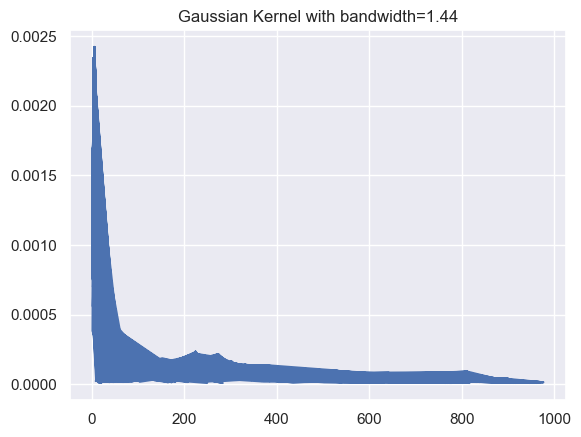

In [26]:
#Gaussian Kernel
kde_model_Gaussian = KernelDensity(kernel='gaussian', bandwidth=best_bw)
kde_model_Gaussian.fit(k)
score_Gaussian = kde_model_Gaussian.score_samples(k)
plt.plot(k[:,1], np.exp(score_Gaussian));
plt.title(f"Gaussian Kernel with bandwidth={best_bw:0.2f}");